To obtain the used data, refer to:

* [GeoJSON Data Source Page](https://www.paisagenslidar.cnptia.embrapa.br/layers/geonode%3Aana_a01_2018_plot_location)
* [GeoJSON URL](https://www.paisagenslidar.cnptia.embrapa.br/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3Aana_a01_2018_plot_location&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&access_token=5908c450d27711ed8e2500163e1134a6)

In [ ]:
! pip install geopandas &> /dev/null
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import zipfile
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Load GeoJSON file obtained from 
geojson_file = '/content/drive/MyDrive/Pachama/geoserver-GetFeature.json'

# Load the GeoJSON file as a GeoDataFrame
gdf = gpd.read_file(geojson_file, crs=4326)

# Transform coordinate system from WSG84/EPSG:4326 to EPSG:32721
gdf = gdf.to_crs(32721)
gdf.head(10)

,id,fid,PlotID,geometry
0,ana_a01_2018_plot_location.1,1,P01,"MULTIPOLYGON (((721901.107 9627178.896, 721899..."
1,ana_a01_2018_plot_location.2,2,P02,"MULTIPOLYGON (((721909.678 9627322.655, 721908..."
2,ana_a01_2018_plot_location.3,3,P03,"MULTIPOLYGON (((721920.266 9627525.787, 721920..."
3,ana_a01_2018_plot_location.4,4,P04,"MULTIPOLYGON (((721926.433 9627672.839, 721926..."
4,ana_a01_2018_plot_location.5,5,P05,"MULTIPOLYGON (((722328.221 9627703.029, 722324..."
5,ana_a01_2018_plot_location.6,6,P06,"MULTIPOLYGON (((722318.296 9627846.278, 722318..."
6,ana_a01_2018_plot_location.7,7,P07,"MULTIPOLYGON (((722310.819 9627993.664, 722310..."
7,ana_a01_2018_plot_location.8,8,P08,"MULTIPOLYGON (((722306.632 9628141.886, 722300..."
8,ana_a01_2018_plot_location.9,9,P09,"MULTIPOLYGON (((722441.542 9627766.226, 722492..."
9,ana_a01_2018_plot_location.10,10,P10,"MULTIPOLYGON (((722589.799 9627788.370, 722629..."


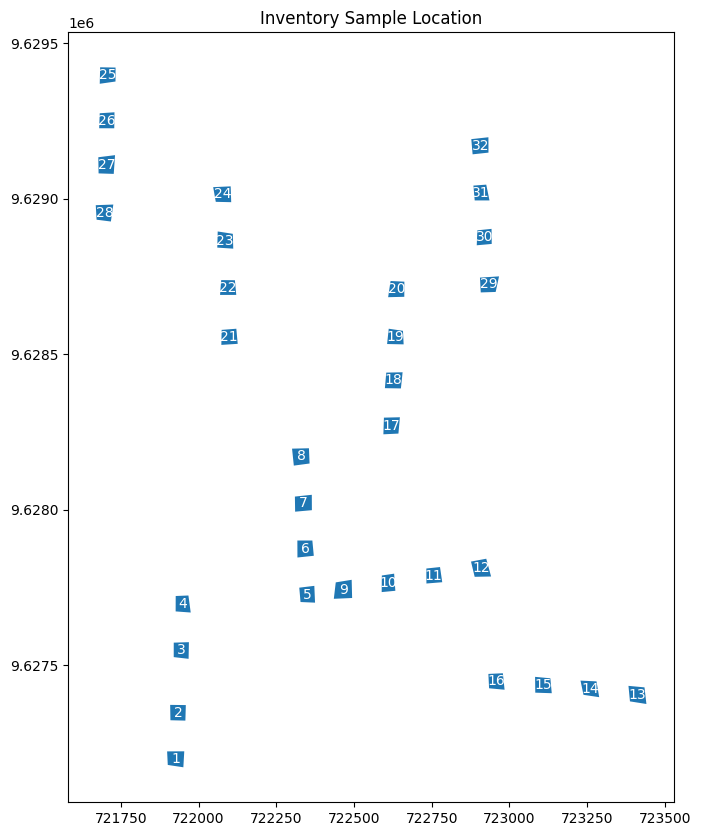

In [5]:
# Create a 
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame on the axis
gdf.plot(ax=ax)

# Plot mulipolygon shapes
for idx, row in gdf.iterrows():
    label = row['fid']
    x, y = row.geometry.centroid.coords[0]
    ax.text(x, y, label, ha='center', va='center', color='white')

# Set the plot title
ax.set_title("Inventory Sample Location")

# Show the plot
plt.show()

In [3]:
# Filter desired geometries to test model on
desired_shapes = [8, 18, 22]
geometries = gdf.geometry[gdf.fid.isin(desired_shapes)].reset_index().drop(columns=['index'])


output_filenames = []
for i, row in geometries.iterrows():
  """ Extract shape file out of each MULTIPOLYGON"""

  # Replace "output_file_{}.shp" with the desired output filename format
  output_filename = "inventory_geometry_{}.shp".format(i)

  # Create a new GeoDataFrame with just this row's geometry
  subset_gdf = gpd.GeoDataFrame([row], crs=gdf.crs)

  # Write the GeoDataFrame to a new .shp file
  subset_gdf.to_file(output_filename, driver="ESRI Shapefile")

  output_filenames.append(output_filename[:-3] + "cpg")
  output_filenames.append(output_filename[:-3] + "dbf")
  output_filenames.append(output_filename[:-3] + "shx")

  output_filenames.append(output_filename)

# Group shape files in zip
with zipfile.ZipFile("inventory_shape_files.zip", "w") as zip:
    for filename in output_filenames:
        zip.write(filename)

# Download Data
from google.colab import files
files.download("inventory_shape_files.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>